In [ ]:
!pip install matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.3 MB 7.8 MB/s eta 0:00:01
   ------------- -------------------------- 2.9/8.3 MB 7.4 MB/s eta 0:00:01
   --------------------- ------------------ 4.5/8.3 MB 7.6 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.3 MB 7.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.6/8.3 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 7.0 MB/s  0:00:01
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 6.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.1 MB 6.7 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 7.1 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.1 MB 7.0 MB/s eta 0:00:01
   -------------------

In [12]:
#!/bin/bash
!kaggle datasets download atharvasoundankar/global-cybersecurity-threats-2015-2024

Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024
License(s): CC0-1.0




  0%|          | 0.00/47.0k [00:00<?, ?B/s]
100%|██████████| 47.0k/47.0k [00:00<00:00, 13.4MB/s]


In [14]:
import zipfile
with zipfile.ZipFile("global-cybersecurity-threats-2015-2024.zip", 'r') as zip_ref:
    zip_ref.extractall(".")


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
path = "Global_Cybersecurity_Threats_2015-2024.csv"
# Load the dataset
df = pd.read_csv(path)
print(df.head())

   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Firewall   
2              Weak 

Text(0, 0.5, 'Número de incidentes')

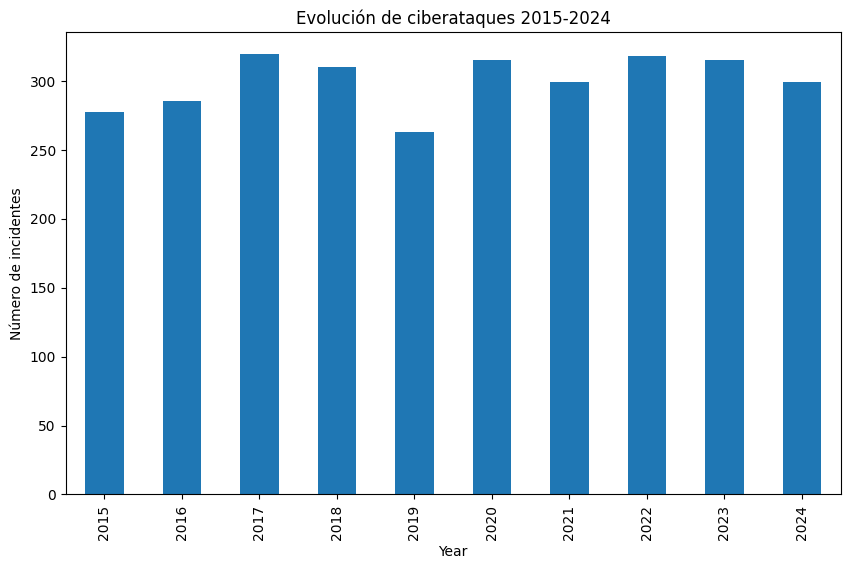

In [19]:
attacks_per_year = df.groupby('Year')['Attack Type'].count()
plt.figure(figsize=(10,6))
attacks_per_year.plot(kind='bar')
plt.title('Evolución de ciberataques 2015-2024')
plt.ylabel('Número de incidentes')